In [1]:
from diffusers import (
    StableDiffusionPipeline,
    StableDiffusionImg2ImgPipeline,
    StableDiffusionInpaintPipeline,
)

text2img = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
img2img = StableDiffusionImg2ImgPipeline(**text2img.components)
inpaint = StableDiffusionInpaintPipeline(**text2img.components)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


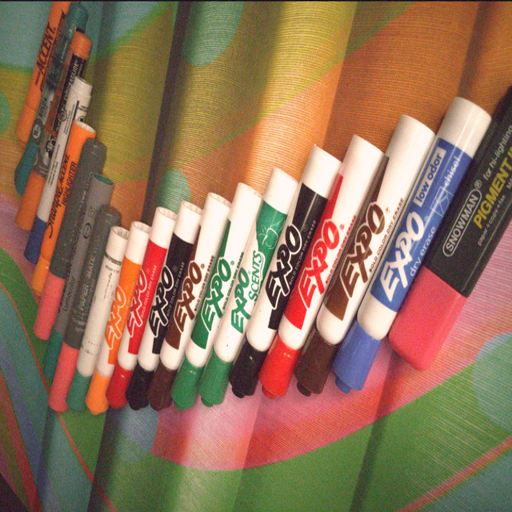

In [2]:
import requests
import torch
from PIL import Image
from io import BytesIO
url ="https://i.ibb.co/F02S2SH/NOISY-SRGB-010.png"


# from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)
pipe = pipe.to(device)

# url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
# url ="https://i.postimg.cc/vTgwrqjQ/NOISY-SRGB-010.png"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((512,512))
init_image

In [ ]:

prompt = ["Remove the noise from the input image and generate a clean version.",
"Enhance the clarity of the image by eliminating noise.",
"Produce a high-quality, denoised image from the given input.",
"Apply denoising to the provided image for improved visual quality.",
"Generate a visually cleaner version of the input image by reducing noise.",
"Improve the image quality by filtering out unwanted noise patterns.",
"Refine the input image by removing noise and enhancing details."]

images = pipe(prompt=prompt, image=init_image, strength=0.01, guidance_scale=1).images
images[0].save("output_cray.png")

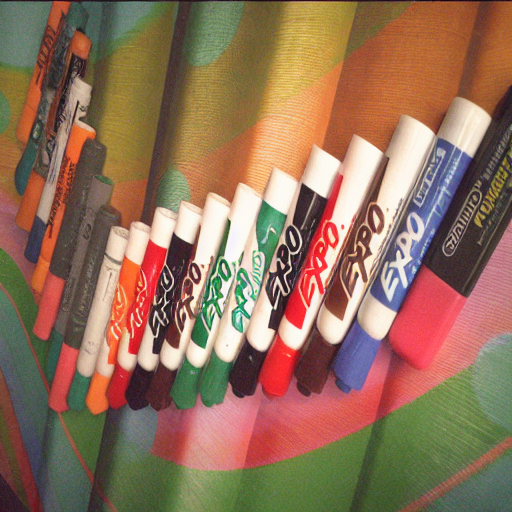

In [4]:
images[0]

In [10]:
imgs_final=[]
img_old=images[0]
for i in range(5):
    images = pipe(prompt=prompt, image=img_old, strength=0.1, guidance_scale=1).images
    img_old=images[0]
    # print(img_old)
    imgs_final.append(img_old)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

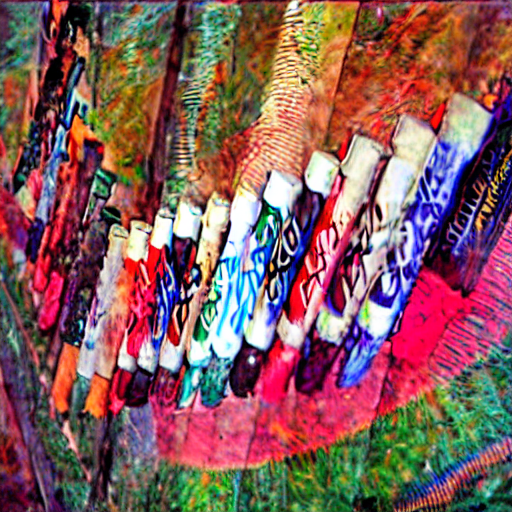

In [14]:
    imgs_final[3]

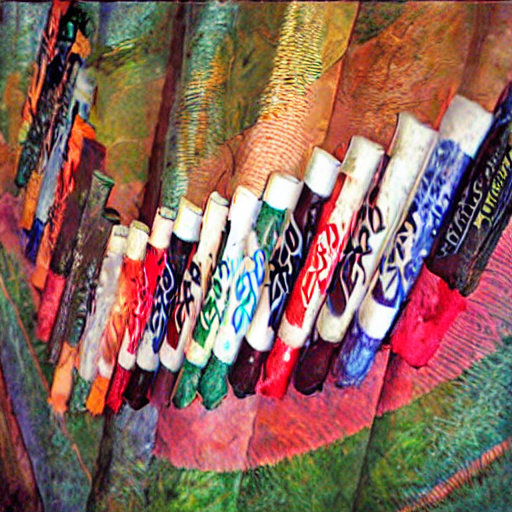

In [7]:
img_old